# ANN

Artificial Neural Networks (ANN) are multi-layer fully-connected neural nets that look like the figure below. They consist of an input layer, multiple hidden layers, and an output layer. Every node in one layer is connected to every other node in the next layer. We make the network deeper by increasing the number of hidden layers.

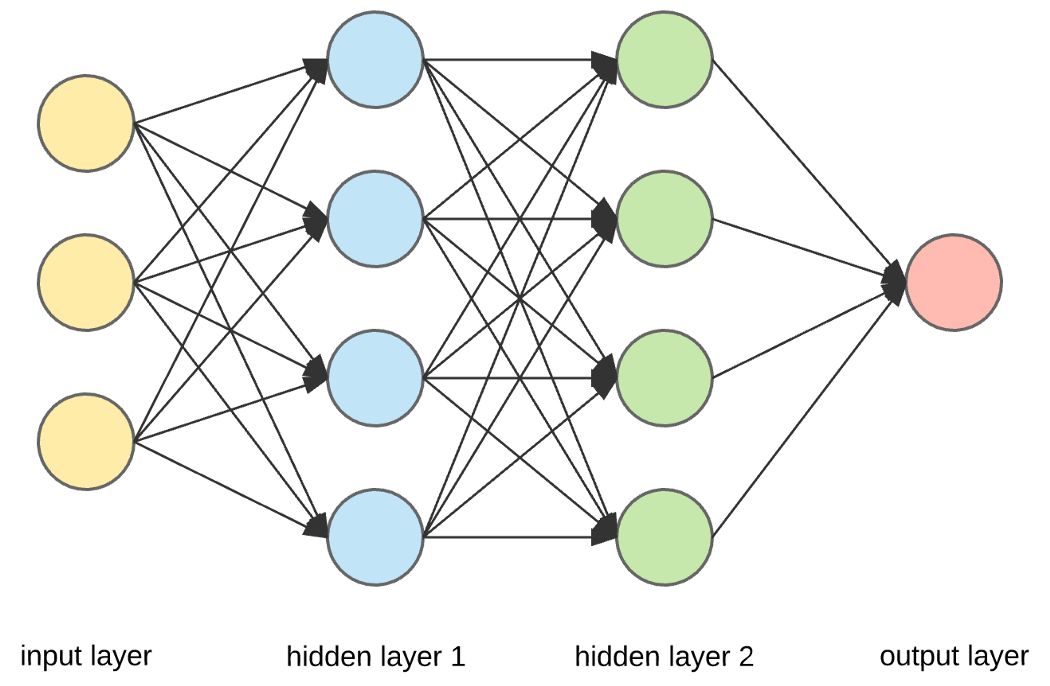

In [1]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import data set
dataset= pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data preprocessing

In [3]:
X= dataset.iloc[:,3:13]
y=dataset.iloc[:,13]
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [4]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [5]:
dataset.Exited.value_counts()/dataset.shape[0]

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [6]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender= pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
X=pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [8]:
X.drop(['Geography','Gender'],axis=1,inplace=True)


In [9]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
#splitting into training and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)


### Features Scalling

Because in neural network features will multiply by weight +b , so make it so this important how much time is taking, suppose 
The magnitude of features are very high number, so weight* features multiplication will takes more time 
So we try to scaled down all the features in same scale.


In [11]:
# Feature scalling is must to converage will happen quickly

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Because in neural network features will multiply by weight +b , so make it so this important how much time is taking, suppose 
# The magnitude of features are very high number, so weight* features multiplication will takes more time 
# So we try to scaled down all the features in same scale.


### Now we will build the ANN Model !
1. Define your model: create a **Sequential** model and **add layers**.
2. Compile your model: specify loss function and optimizers and call the **.compile()** function.
3. Fit your model: train the model on data by calling the **.fit()** function.
4. Make predictions: use the model to generate predictions on new data by calling functions such as .evaluate() or **.predict()**.

In [12]:
import keras
from keras.models import Sequential  # for all deep learning neural network
from keras.layers import Dense #for hidden layer 
from keras.layers import LeakyReLU,PReLU,ELU # for Activation function 
from keras. layers import Dropout  # to avoid overfittin---> if neural network is too deep we usually used this

In [13]:
# Initialising the ANN
classifier= Sequential()

### Creating input layer/Hidden layer/Output layer
- The Dense function in Keras constructs a fully connected neural network layer, automatically initializing the weights as biases. 
- units: The first argument, representing number of nodes in this layer. Since we’re constructing the output layer, and we said it has only one node, this value is 1
- activation: The activation function of a logistic regression model is the logistic function, or alternatively called the sigmoid
  - input_dim= no fo features in training
  - We know in **hidden layer** ---------> generally used **Relu** activation function to avoid vanishing gradient problem
  - With **Relu** Activation function----> generally **he_unifrom and he_normal** work very well
  - In final layer/ **output layer**-----> we generally used **sigmoid** Activation fucntion, and weight initilization **glorot_uniform** works pretty well.


In [14]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
# input_dim= no fo features in training
# We know in hidden layer we generally used Relu activation function to avoid vanishing gradient problem
# With Relu Activation function----> generally he_unifrom and he_normal work very well
# In final layer/ output layer----> we generally used sigmoid Activation fucntion, and weight initilization glorot_uniform works
# pretty well.

#classifier.add(dropout(0.3))

# Adding the second hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))


In [15]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


### Complining the ANN
- optimizer: Which optimizer to use in order to minimize the loss function.
- loss: The loss function to minimize. Since we’re building a binary 0/1 classifier, the loss function to minimize is binary_crossentropy
- metrics: Which metric to report statistics on, for classification problems we set this as accuracy.
  - We mostly prefer optimizer----> Adam
  - Loss function for Binary----> binary_crossentropy
  - loss function for multiple class -----> categorical_crossentropy


In [16]:
# compiling ANN
classifier.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### Fitting the ANN to the Training set
- epochs: Number of times to go over the entire training data. When training models we pass through the training data not just once but multiple times.
 - We will prefer to give data in **batch size** in training, so it will run 
 - We will also have to mention How many epochs we will set, since in this dataset there are 10,000 records, so no of epoch * batch size----> batch size =10, epochs=100 
 - validation_split-----> to test the model seperatly for the test dataset

In [18]:
#fitting the ANN to the training set
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.6543 - accuracy: 0.6776 - val_loss: 0.5142 - val_accuracy: 0.7838
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4866 - accuracy: 0.7932 - val_loss: 0.4789 - val_accuracy: 0.7952
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4637 - accuracy: 0.7960 - val_loss: 0.4630 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4503 - accuracy: 0.7962 - val_loss: 0.4518 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4408 - accuracy: 0.7962 - val_loss: 0.4436 - val_accuracy: 0.7952
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4331 - accuracy: 0.7959 - val_loss: 0.4372 - val_accuracy: 0.7959
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4263 - accuracy: 0.7960 - val_loss: 0.4287 - val_accuracy: 0.7993

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3326 - accuracy: 0.8627 - val_loss: 0.3635 - val_accuracy: 0.8527
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3321 - accuracy: 0.8628 - val_loss: 0.3605 - val_accuracy: 0.8546
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3327 - accuracy: 0.8630 - val_loss: 0.3654 - val_accuracy: 0.8554
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3313 - accuracy: 0.8615 - val_loss: 0.3639 - val_accuracy: 0.8482
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3318 - accuracy: 0.8630 - val_loss: 0.3612 - val_accuracy: 0.8565
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3311 - accuracy: 0.8621 - val_loss: 0.3629 - val_accuracy: 0.8542
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3305 - accuracy: 0.8649 - val_loss: 0.3626 - val_accuracy:

In [22]:
# predicting the model
y_pred= classifier.predict(X_test)
y_pred= (y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

#### Printing the confusion matrix, accuracy, and classification report
The confusion matrix shows us how many classes were correctly classified vs misclassified. The numbers on the diagonal axis represent the number of correctly classified points, the rest are the misclassified ones.


In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

cm= confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print('The accuracy of the model is',accuracy)
cl_report = classification_report(y_test,y_pred)
print(cl_report)

[[1500   95]
 [ 182  223]]
The accuracy of the model is 0.8615
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1595
           1       0.70      0.55      0.62       405

    accuracy                           0.86      2000
   macro avg       0.80      0.75      0.77      2000
weighted avg       0.85      0.86      0.86      2000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


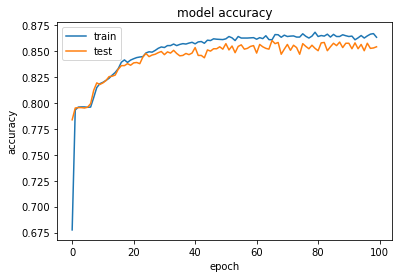

In [31]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

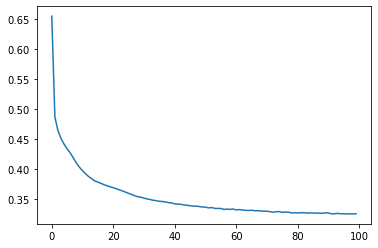

In [32]:
plt.plot(model_history.history['loss'])

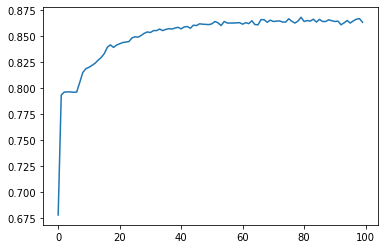

In [33]:
plt.plot(model_history.history['accuracy'])

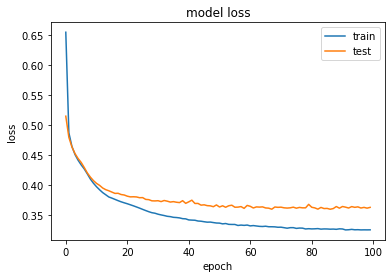

In [35]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
